
# **Unsupervised Learning - K-Means**

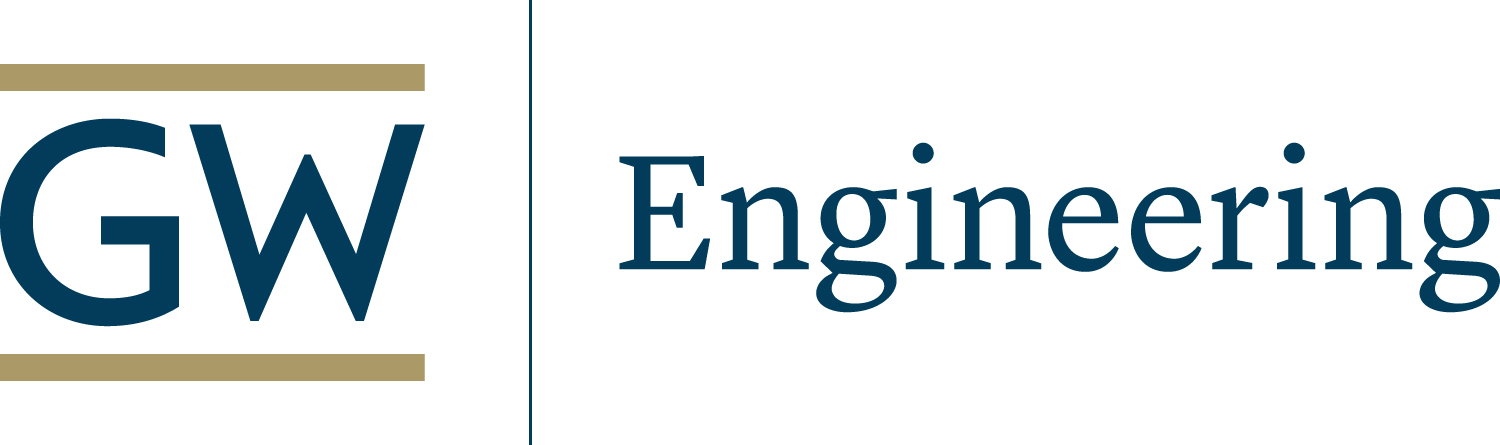

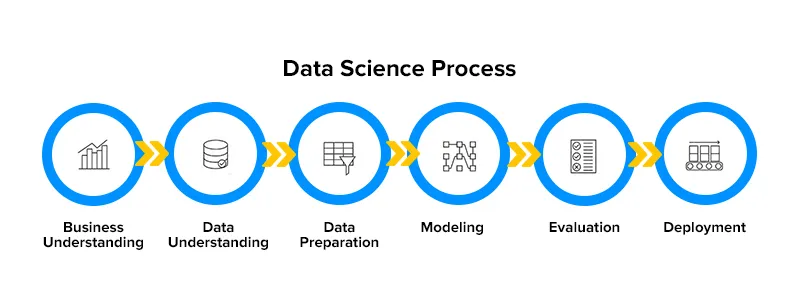

https://medium.com/@zuhailinasir_26370/data-science-process-ad8d1978377e

In [2]:
#Load the libraries - Load them all here - not sprinkled throughout the notebook.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import make_scorer

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore') #ignore warnings

In [ ]:
#Rememeber to use your Google drive to save work and use data files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


See if you are connected to a TPU or GPU

In [ ]:
!nvidia-smi

Sat Feb  1 00:13:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Load the dataset (Using CSAT to highlight last weeks common issues)
df = pd.read_csv('../data/output.csv')


In [5]:
#initial check of the data
df.head(5)

host_response_rate  host_identity_verified  host_total_listings_count  \
0                  90                       1                          6   
1                 100                       1                          7   
2                 100                       1                          7   
3                 100                       1                          1   
4                 100                       0                         12   

   city  is_location_exact  property_type  room_type  accommodates  bathrooms  \
0     1                  1              0          1             1        1.0   
1     2                  1              8          1             2        1.0   
2     2                  1              0          0             4        1.0   
3     2                  1              0          1             2        1.0   
4     2                  1              0          0             3        1.0   

   bedrooms  ...  bed_type  amenities  price  minimum_nights  \
0       1.0  ...         4        547   4000               7   
1       1.0  ...         4       1158  14500               3   
2       1.0  ...         4       2016  19500               3   
3       1.0  ...         4        964   6500               3   
4       1.0  ...         4       1794  15400              30   

   number_of_reviews  review_scores_rating  instant_bookable  \
0                 34                  90.0                 0   
1                 36                  91.0                 0   
2                 47                  95.0                 0   
3                 41                  98.0                 0   
4                 18                  91.0                 0   

   cancellation_policy  reviews_per_month  fraud  
0                    2               0.38      0  
1                    2               0.40      0  
2                    2               0.54      1  
3                    1               0.47      0  
4                    1               0.21      0  

[5 rows x 21 columns]

### **DATA UNDERSTANDING**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [7]:
df.describe()

host_response_rate  host_identity_verified  host_total_listings_count  \
count          3585.00000             3585.000000                3585.000000   
mean             95.64742                0.726081                  58.902371   
std              11.78841                0.446030                 171.119663   
min               0.00000                0.000000                   0.000000   
25%              98.00000                0.000000                   1.000000   
50%             100.00000                1.000000                   2.000000   
75%             100.00000                1.000000                   7.000000   
max             100.00000                1.000000                 749.000000   

              city  is_location_exact  property_type    room_type  \
count  3585.000000        3585.000000    3585.000000  3585.000000   
mean      2.820363           0.859135       1.873361     0.429010   
std       4.071361           0.347930       3.327397     0.538211   
min       0.000000           0.000000       0.000000     0.000000   
25%       2.000000           1.000000       0.000000     0.000000   
50%       2.000000           1.000000       0.000000     0.000000   
75%       2.000000           1.000000       4.000000     1.000000   
max      37.000000           1.000000      12.000000     2.000000   

       accommodates    bathrooms     bedrooms  ...     bed_type    amenities  \
count   3585.000000  3585.000000  3585.000000  ...  3585.000000  3585.000000   
mean       3.041283     1.220781     1.255230  ...     3.909902  1570.437378   
std        1.778929     0.500698     0.752129  ...     0.511011   873.197307   
min        1.000000     0.000000     0.000000  ...     0.000000     0.000000   
25%        2.000000     1.000000     1.000000  ...     4.000000   844.000000   
50%        2.000000     1.000000     1.000000  ...     4.000000  1604.000000   
75%        4.000000     1.000000     2.000000  ...     4.000000  2280.000000   
max       16.000000     6.000000     5.000000  ...     4.000000  3091.000000   

               price  minimum_nights  number_of_reviews  review_scores_rating  \
count    3585.000000     3585.000000        3585.000000           3585.000000   
mean    17392.580195        3.171269          19.044630             93.749791   
std     14833.132129        8.874133          35.571658              9.039049   
min      1000.000000        1.000000           0.000000             20.000000   
25%      8500.000000        1.000000           1.000000             91.000000   
50%     15000.000000        2.000000           5.000000             97.000000   
75%     22000.000000        3.000000          21.000000            100.000000   
max    400000.000000      300.000000         404.000000            100.000000   

       instant_bookable  cancellation_policy  reviews_per_month        fraud  
count       3585.000000          3585.000000        3585.000000  3585.000000  
mean           0.165690             1.210042           1.766165     0.213947  
std            0.371854             0.877998           1.924877     0.410147  
min            0.000000             0.000000           0.010000     0.000000  
25%            0.000000             0.000000           0.640000     0.000000  
50%            0.000000             1.000000           1.000000     0.000000  
75%            0.000000             2.000000           2.130000     0.000000  
max            1.000000             3.000000          19.150000     1.000000  

[8 rows x 21 columns]

In [8]:
df.isna().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

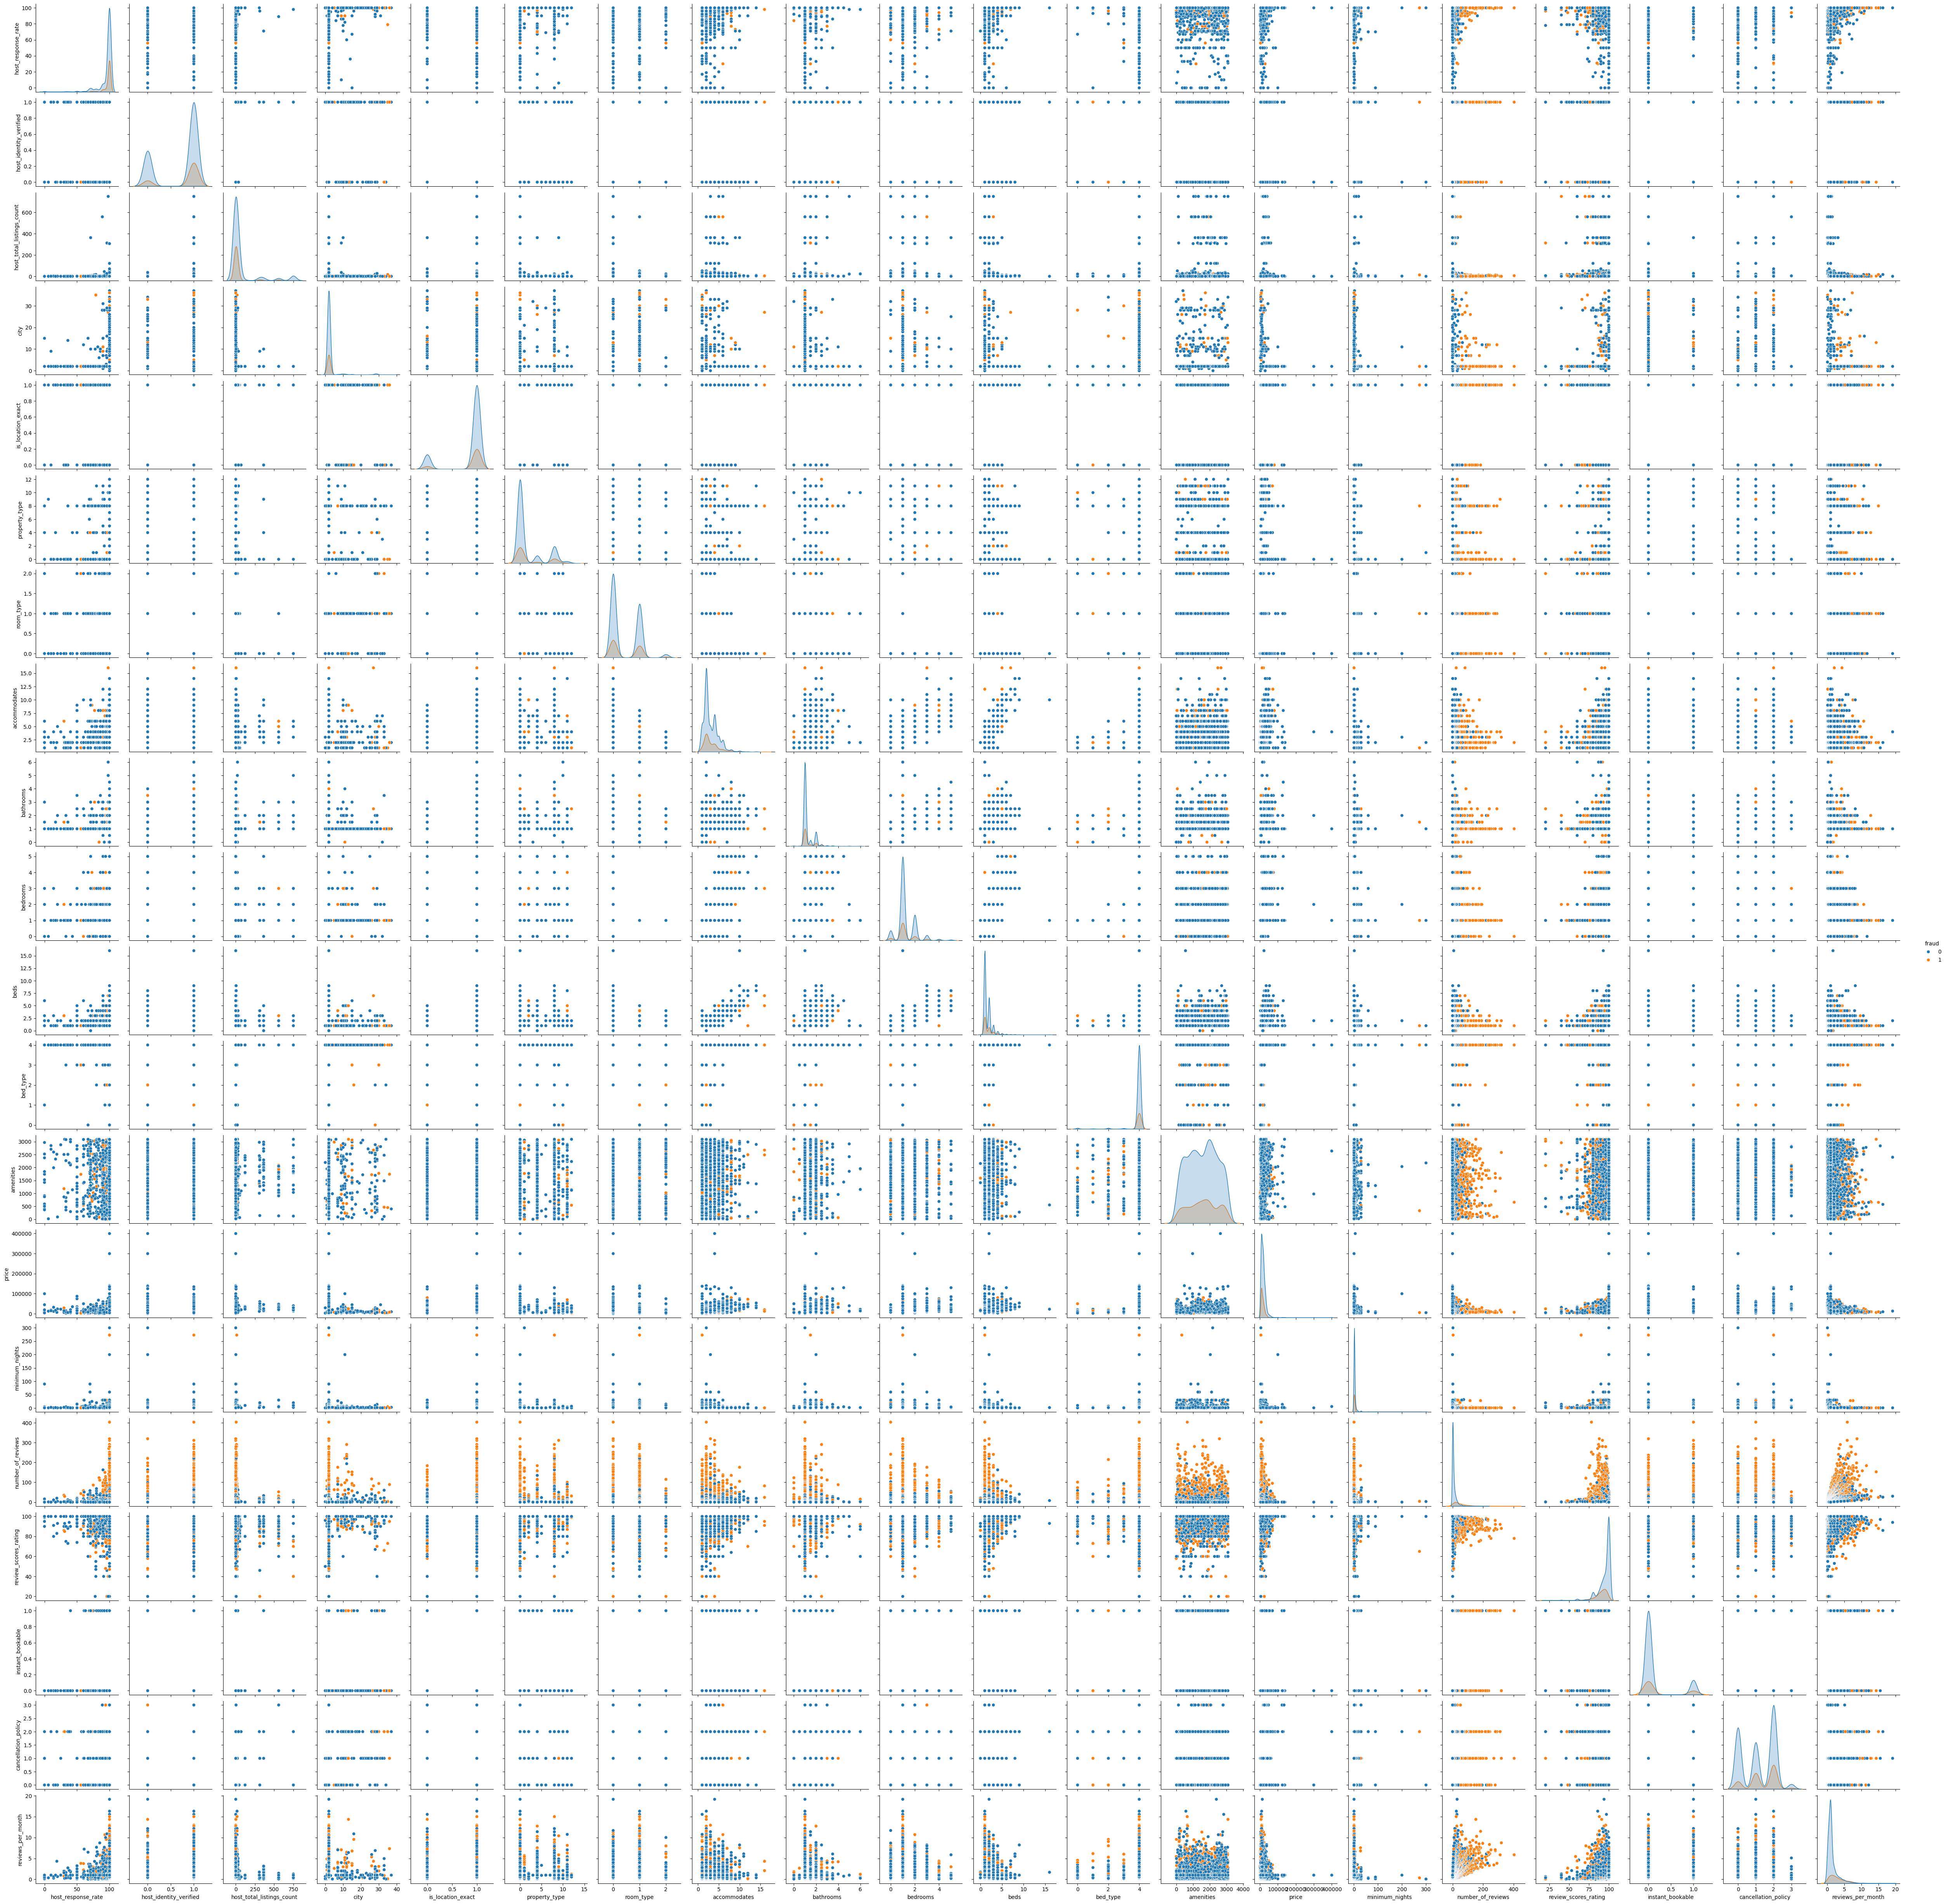

In [ ]:
sns.pairplot(df, hue='fraud')
plt.show()

In [ ]:
df.corr()

host_response_rate  host_identity_verified  \
host_response_rate                   1.000000                0.039946   
host_identity_verified               0.039946                1.000000   
host_total_listings_count           -0.068956                0.197853   
city                                 0.026329               -0.026797   
is_location_exact                    0.014010                0.085709   
property_type                        0.032792               -0.002512   
room_type                           -0.004518               -0.063592   
accommodates                         0.026307                0.084937   
bathrooms                            0.013003                0.067850   
bedrooms                            -0.009075                0.052927   
beds                                 0.018307                0.036877   
bed_type                            -0.027878                0.063074   
amenities                           -0.009108                0.000111   
price                                0.001229                0.002059   
minimum_nights                      -0.028105               -0.003864   
number_of_reviews                    0.099759                0.150444   
review_scores_rating                 0.030248               -0.003786   
instant_bookable                    -0.004364                0.055024   
cancellation_policy                  0.032389                0.213218   
reviews_per_month                    0.096914                0.073126   
fraud                                0.073603                0.094709   

                           host_total_listings_count      city  \
host_response_rate                         -0.068956  0.026329   
host_identity_verified                      0.197853 -0.026797   
host_total_listings_count                   1.000000 -0.059264   
city                                       -0.059264  1.000000   
is_location_exact                           0.122412 -0.041111   
property_type                              -0.165617  0.081714   
room_type                                  -0.251159  0.114253   
accommodates                                0.160164 -0.012228   
bathrooms                                   0.169670 -0.010719   
bedrooms                                    0.138077  0.010876   
beds                                        0.038519  0.001780   
bed_type                                    0.054319 -0.017169   
amenities                                   0.072145 -0.049060   
price                                       0.171930 -0.077171   
minimum_nights                              0.057400 -0.006446   
number_of_reviews                          -0.140612  0.026436   
review_scores_rating                       -0.019810  0.002220   
instant_bookable                           -0.048773  0.055972   
cancellation_policy                         0.328175 -0.030030   
reviews_per_month                          -0.174989  0.004336   
fraud                                      -0.095516 -0.013070   

                           is_location_exact  property_type  room_type  \
host_response_rate                  0.014010       0.032792  -0.004518   
host_identity_verified              0.085709      -0.002512  -0.063592   
host_total_listings_count           0.122412      -0.165617  -0.251159   
city                               -0.041111       0.081714   0.114253   
is_location_exact                   1.000000       0.026523  -0.115252   
property_type                       0.026523       1.000000   0.262803   
room_type                          -0.115252       0.262803   1.000000   
accommodates                        0.063494      -0.029332  -0.520913   
bathrooms                           0.085679       0.228309  -0.075647   
bedrooms                            0.059592       0.057403  -0.270567   
beds                                0.041094       0.052574  -0.350446   
bed_type                            0.076113       0.008549  -0.233769   
ameni

<Axes: >

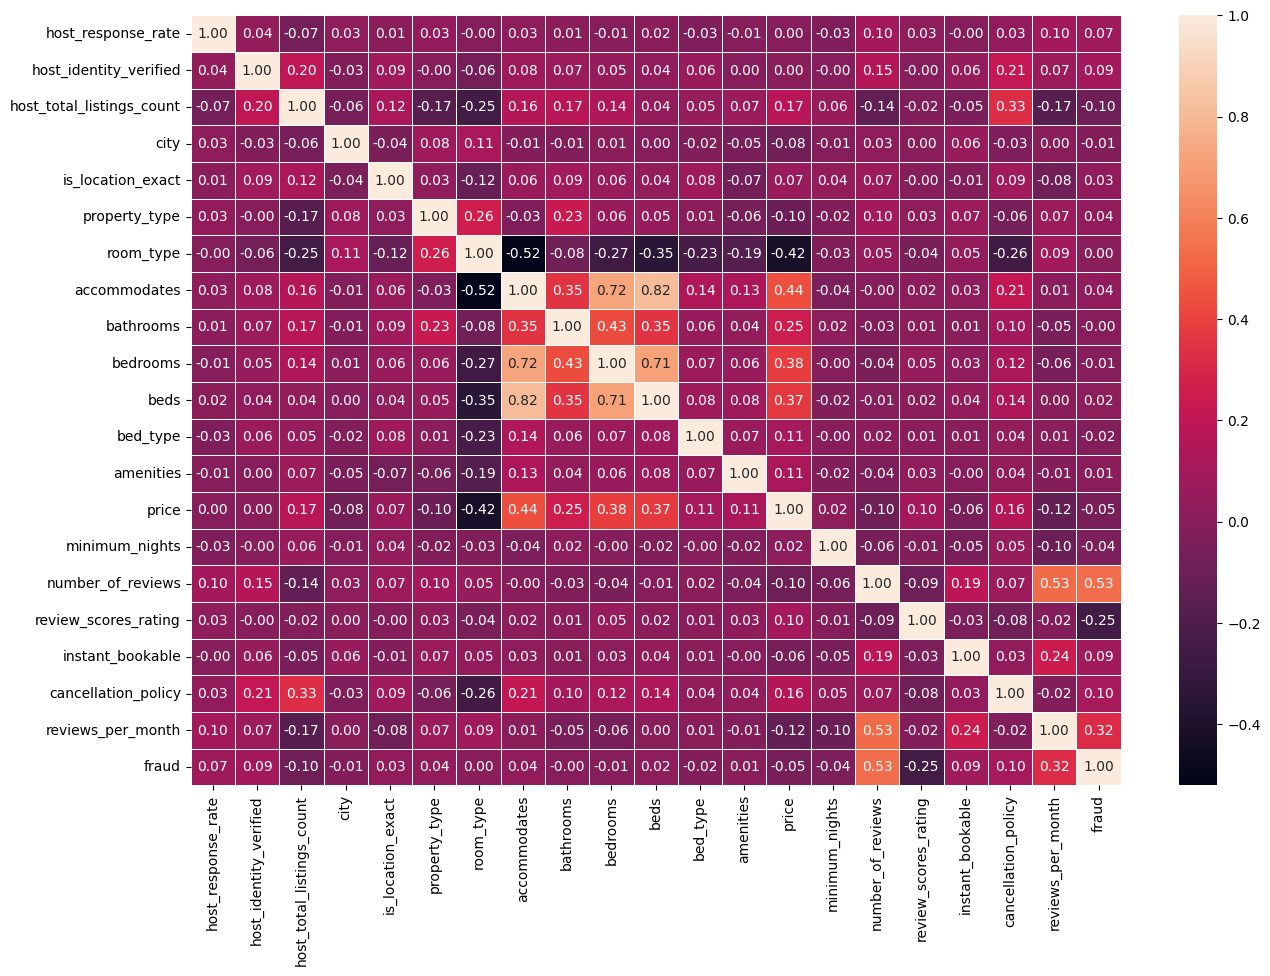

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, fmt='.2f')

fraud
0    2818
1     767
Name: count, dtype: int64


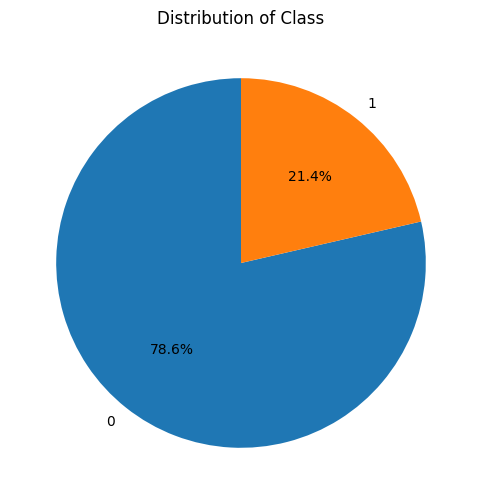

In [9]:
class_counts = df['fraud'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class')
plt.show()


This looks imbalanced, so if we may want to sample or stratefy, but in unsupervised learning, we have no labels!  So keep that in mind as we might now be able to do this in actual practice

Now lets identify outliers to see if we might have candidates for removal or if we should account for these large outliers in our normalization or standardization operations.

(0.0, 200.0)

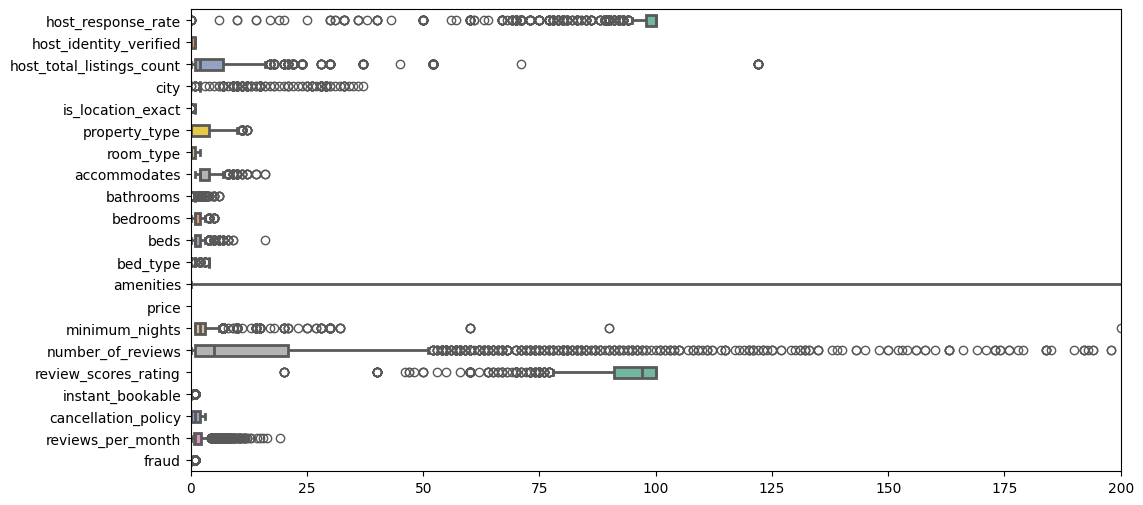

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, showfliers=True, orient='h', palette='Set2', linewidth=2, width=0.5)
plt.xlim(0, 200)

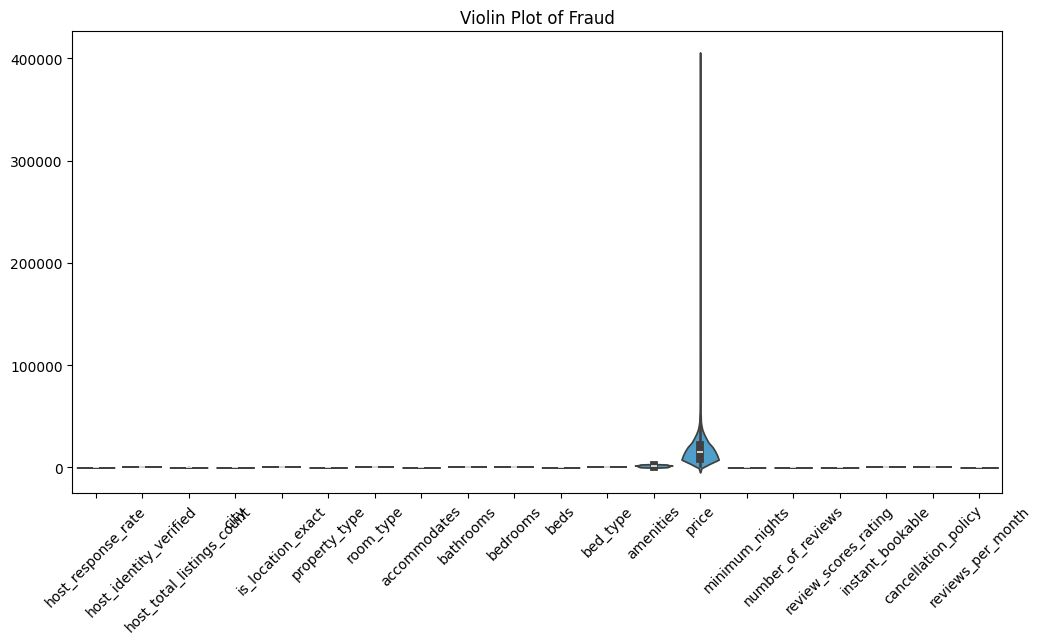

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data = X)
plt.title(f'Violin Plot of Fraud')
plt.xticks(rotation=45)
plt.show()

### **DATA PREPARATION**

We only need X but to check on our performance we will keep a y to see how well this works.

In [10]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [11]:
X_scaled = StandardScaler().fit_transform(X) # notice we did not use test train split...

Text(0.5, 1.0, 'Box Plot of Fraud')

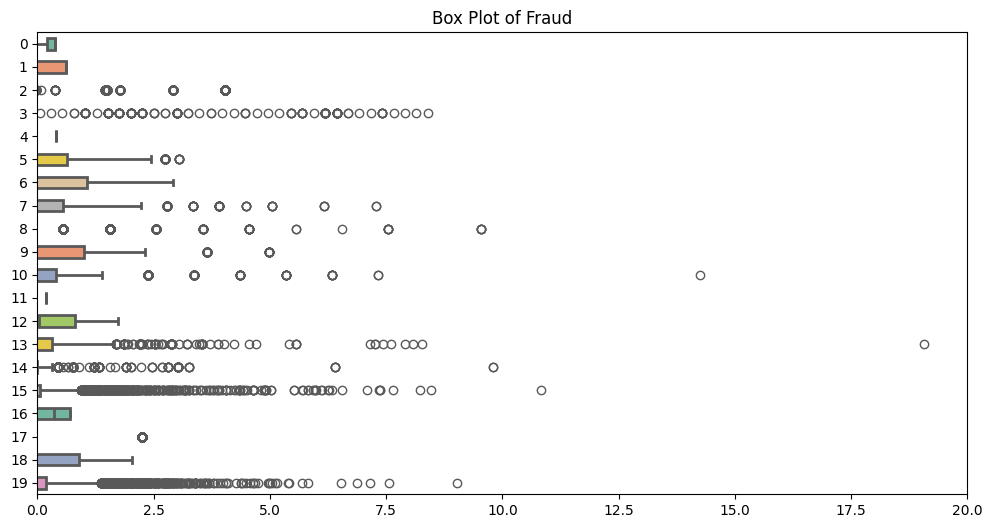

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled, showfliers=True, orient='h', palette='Set2', linewidth=2, width=0.5)
plt.xlim(0, 20)
plt.title(f'Box Plot of Fraud')


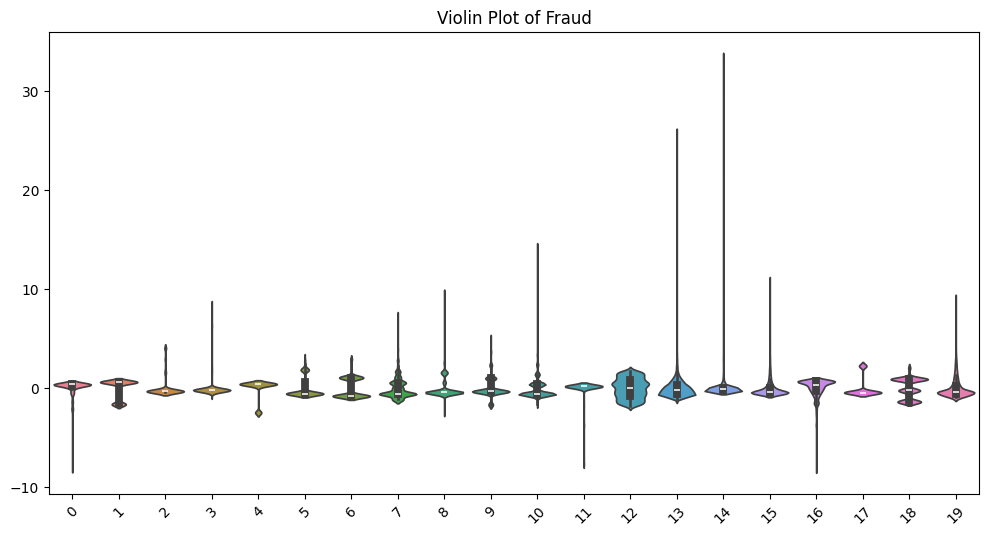

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(data = X_scaled)
plt.title(f'Violin Plot of Fraud')
plt.xticks(rotation=45)
plt.show()

We do not always need to perform a test train split with unsupervised, but it is good if you do want to check if your model generalizes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)


We will leave all features in for now and cover feature selection in the iteration section; however, we will scale our data.  As the data had a large number of outliers, we will use standardization.

Data is prepped now we move to the training of the model.

### **MODELING**

We must contruct our own way of performing a grid search using another scoring method as the decider.  Here we will use silhouette score

In [ ]:
# Define a custom scoring function (using silhouette score)
def silhouette_scorer(estimator, X):
    # Extract the KMeans step from the pipeline
    kmeans_step = estimator.named_steps['kmeans']
    # Fit and predict labels using the KMeans model
    labels = kmeans_step.fit_predict(X)
    # Calculate silhouette score
    sil = silhouette_score(X, labels)
    return sil

# Define the parameter grid
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 300],
    # 'pca__n_components': [2, 3, 4, 5, 6]
}

# Create the KMeans estimator
kmeans = KMeans(random_state=42)


pipeline_km = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA()),
    ('kmeans', kmeans)
])

# Use GridSearchCV with the custom silhouette scorer
grid_search = GridSearchCV(pipeline_km, param_grid=param_grid, scoring=silhouette_scorer, cv=5, verbose = 2)

# Fit the model
grid_search.fit(X_train)

# Print the best parameters and the best silhouette score
print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)


The Elbow Method is a technique used to determine the optimal number of clusters in K-Means clustering. It does so by plotting the within-cluster sum of squared errors (WCSS) against the number of clusters (k). The "elbow" point in this plot (where the curve bends) suggests the optimal number of clusters.

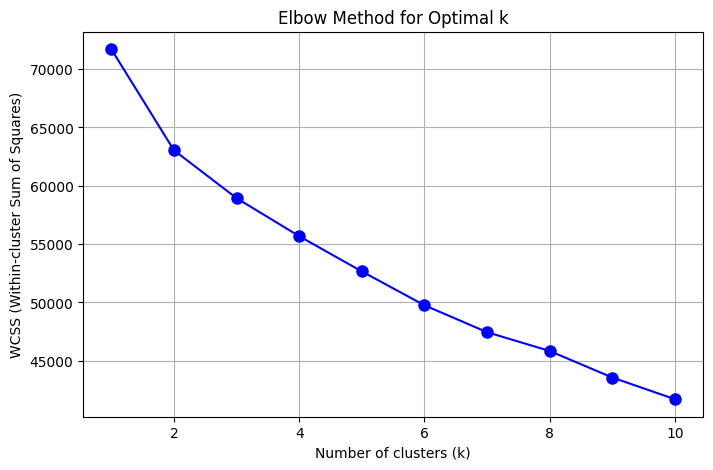

In [ ]:
wcss = []
K = range(1, 11)  # Test k values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

#Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
# PCA is already imported in cell 2, so you can use PCA directly.

PCA is available for use in this notebook. You do not need to import it again.

In [16]:
from sklearn.decomposition import PCA

Must scale data to do PCA

In [17]:
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=3).fit_transform(X_scaled)

In [18]:
X_pca.shape

(3585, 3)

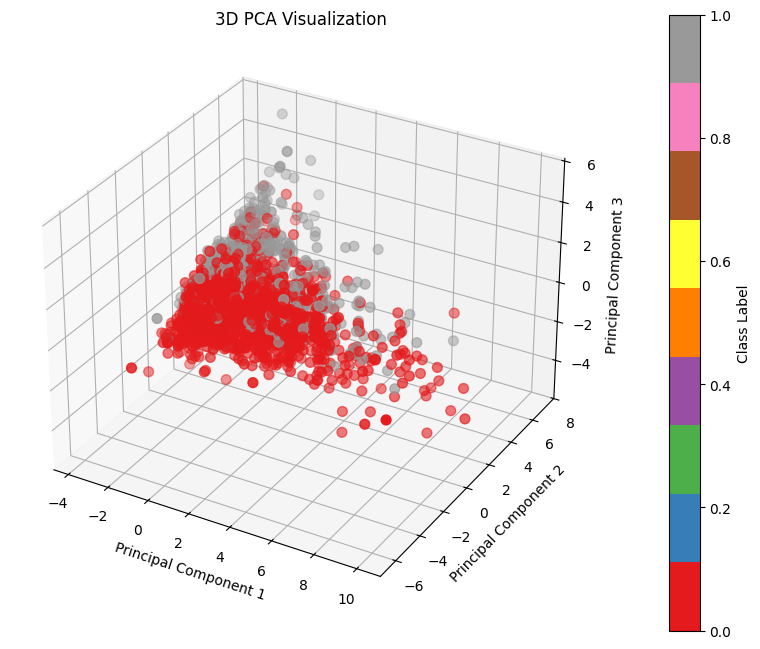

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot of the PCA-transformed data colored by class label
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='Set1', s=50)

ax.set_title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a colorbar for class labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Class Label')

plt.show()

In [22]:
# Show the explained variance ratio for each principal component
explained_variance = PCA(n_components=12).fit(X_scaled).explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance)
print("Total variance explained by 3 components:", explained_variance.sum())

Explained variance ratio for each principal component: [0.17575205 0.0954839  0.07928113 0.06549388 0.05392025 0.05195211
 0.05084216 0.04924909 0.04793545 0.04728842 0.04295238 0.04088012]
Total variance explained by 3 components: 0.8010309434620883


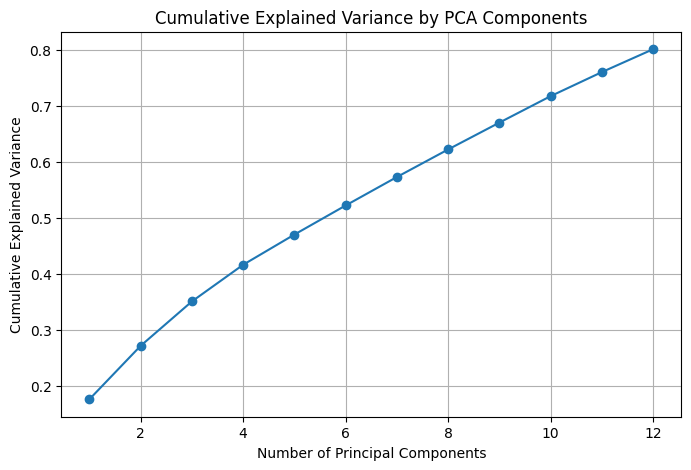

In [23]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

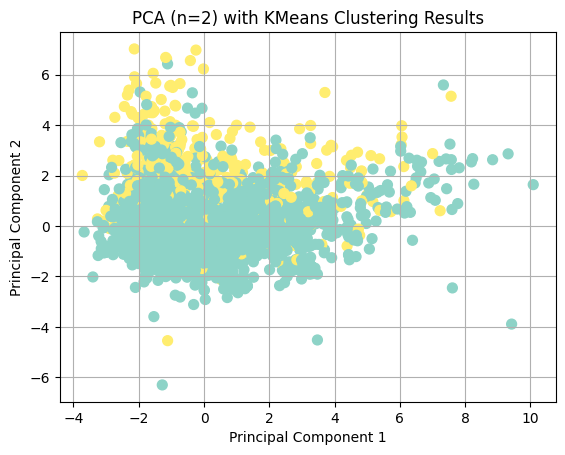

In [ ]:
# Scatter plot of the PCA-transformed data colored by KMeans cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set3', s=50)

# Customize the plot
plt.title('PCA (n=2) with KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Show plot
plt.show()

In [ ]:
X_pca_3d = PCA(n_components=3).fit_transform(X_scaled)

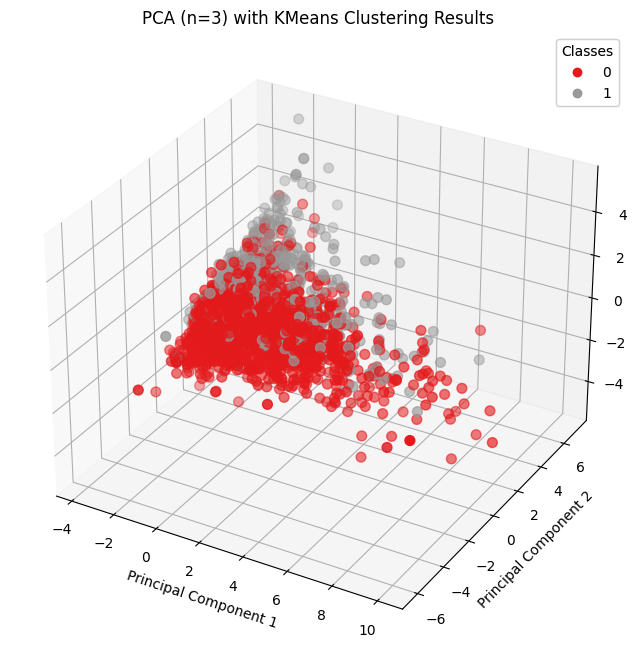

In [ ]:

#Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA-transformed data colored by KMeans cluster labels
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Set1', s=50)

# Customize the plot
ax.set_title('PCA (n=3) with KMeans Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.grid(True)

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)


# Show the 3D plot
plt.show()

This seems to agree with our gridsearch with silhouette

In [ ]:
grid_search.best_params_['kmeans__n_clusters']

2

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

labels_train = grid_search.predict(X_train)
labels_test = grid_search.predict(X_test)

silhouette_vals_train = silhouette_samples(X_train, labels_train)
silhouette_vals_test = silhouette_samples(X_test, labels_test)

print('Silhouette Train', silhouette_vals_train.mean())
print('Silhouette Test', silhouette_vals_test.mean())



Silhouette Train 0.3637707961076289
Silhouette Test 0.36604415781646765


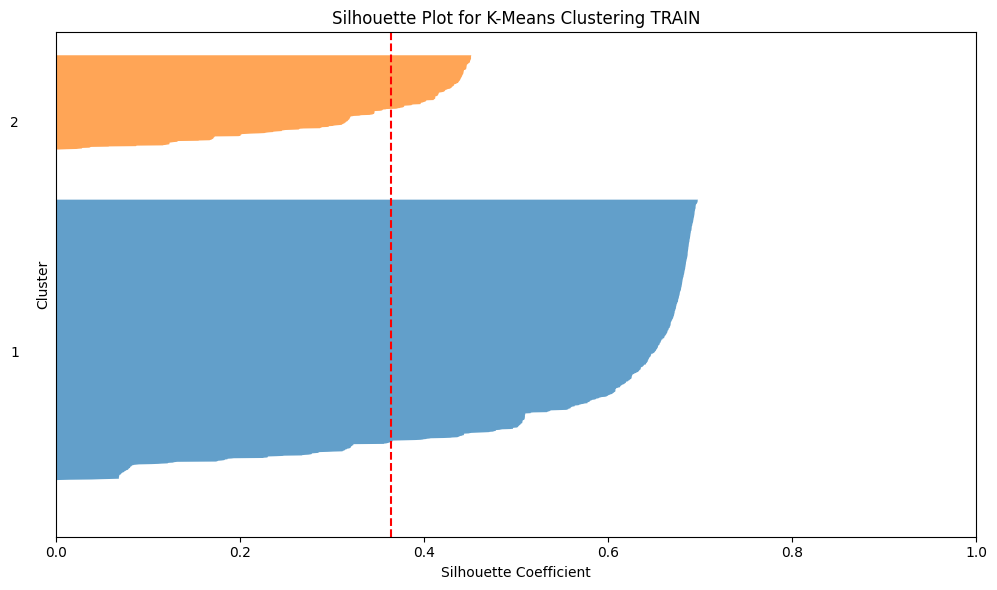

In [ ]:
# Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))

# The silhouette coefficient can range from -1, 1. Initialize y-axis
y_lower, y_upper = 0, 0

n_clusters = grid_search.best_params_['kmeans__n_clusters']

# Create silhouette plot for each cluster
for i in range(n_clusters):
    # Select silhouette scores for samples in the current cluster
    cluster_silhouette_vals = silhouette_vals_train[labels_train == i]
    cluster_silhouette_vals.sort()  # Sort the values

    # Determine y_upper (height of each silhouette bar)
    y_upper += len(cluster_silhouette_vals)

    # Fill in the silhouette plot for this cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)

    # Label the silhouette plot
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))

    # Update y_lower for the next cluster
    y_lower += len(cluster_silhouette_vals)

# Step 6: Add a vertical line for the average silhouette score across all clusters
avg_score = silhouette_score(X_train, labels_train)
ax.axvline(avg_score, color="red", linestyle="--")

# Step 7: Customize the plot
ax.set_title('Silhouette Plot for K-Means Clustering TRAIN')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')

ax.set_yticks([])  # Clear the y-axis labels (optional)
ax.set_xlim([0, 1])  # Set x-axis limits (silhouette scores are in this range)
plt.tight_layout()
plt.show()


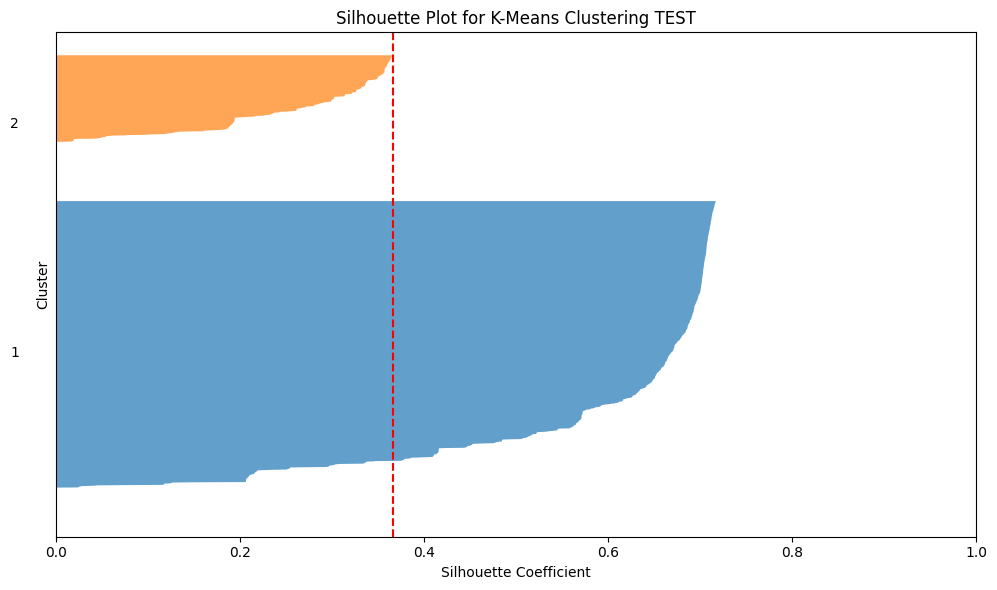

In [ ]:
# Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))

# The silhouette coefficient can range from -1, 1. Initialize y-axis
y_lower, y_upper = 0, 0

n_clusters = grid_search.best_params_['kmeans__n_clusters']

# Create silhouette plot for each cluster
for i in range(n_clusters):
    # Select silhouette scores for samples in the current cluster
    cluster_silhouette_vals = silhouette_vals_test[labels_test == i]
    cluster_silhouette_vals.sort()  # Sort the values

    # Determine y_upper (height of each silhouette bar)
    y_upper += len(cluster_silhouette_vals)

    # Fill in the silhouette plot for this cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)

    # Label the silhouette plot
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))

    # Update y_lower for the next cluster
    y_lower += len(cluster_silhouette_vals)

# Step 6: Add a vertical line for the average silhouette score across all clusters
avg_score = silhouette_score(X_test, labels_test)
ax.axvline(avg_score, color="red", linestyle="--")

# Step 7: Customize the plot
ax.set_title('Silhouette Plot for K-Means Clustering TEST')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')

ax.set_yticks([])  # Clear the y-axis labels (optional)
ax.set_xlim([0, 1])  # Set x-axis limits (silhouette scores are in this range)
plt.tight_layout()
plt.show()

In [ ]:
km_accuracy_train = accuracy_score(y_train, labels_train)
km_accuracy_test = accuracy_score(y_test, labels_test)

print("train Accuracy:", km_accuracy_train)
print("test Accuracy:", km_accuracy_test)

train Accuracy: 0.5915178571428571
test Accuracy: 0.5800334634690463


In [ ]:
km_recall_train = recall_score(y_train, labels_train)
km_recall_test = recall_score(y_test, labels_test)
km_precision_train = precision_score(y_train, labels_train)
km_precision_test = precision_score(y_test, labels_test)

print("train Recall:", km_recall_train)
print("test Recall:", km_recall_test)
print("train Precision:", km_precision_train)
print("test Precision:", km_precision_test)

train Recall: 0.2823834196891192
test Recall: 0.25984251968503935
train Precision: 0.19326241134751773
test Precision: 0.1736842105263158


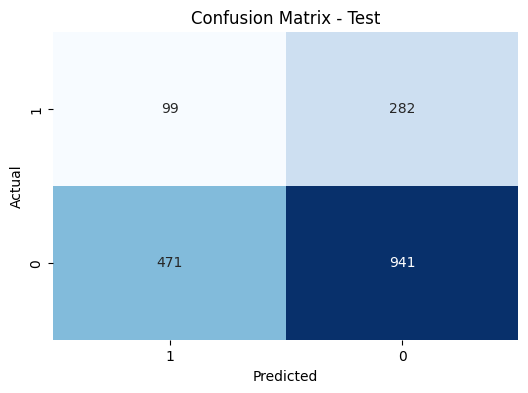

In [ ]:
conf_matrix_test = confusion_matrix(y_test, labels_test, labels=[1, 0])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

In [ ]:
df_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv')

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [ ]:
catagorical_vars = []
for col in df_wine.columns:
  if df_wine[col].dtype == 'object':
    catagorical_vars.append(col)
print(catagorical_vars)

['Type']


In [ ]:
l_encoder = LabelEncoder()
for col in catagorical_vars:
  df_wine[col] = l_encoder.fit_transform(df_wine[col])

In [ ]:
X = df_wine.drop(['Type', 'quality'], axis=1)
y = df_wine['quality']
y1 = df_wine['Type']

In [ ]:
# Create a pipeline with StandardScaler and DBSCAN
pipeline_dbs = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA()),
    ('dbscan', DBSCAN())
])

# Define the parameter grid for GridSearchCV
param_grid_dbs = {
    'dbscan__eps': [.01, .1, 0.3, 0.5, 0.7],          # Maximum distance for clustering
    'dbscan__min_samples': [2, 3, 5, 10],        # Minimum number of points to form a cluster
    # 'pca__n_components': [2, 3, 4, 5, 6]
}

# Define a custom scoring function to handle cases with noise
def custom_silhouette_scorer_dbs(estimator, X):
    labels = estimator.fit_predict(X)  # Fit and predict labels
    if len(set(labels)) > 1 and -1 not in labels:  # Ensure at least 2 clusters and no noise
        return silhouette_score(X, labels)
    else:
        return -1  # Return a low score if not applicable

# Use GridSearchCV with the custom silhouette scorer
grid_search_dbs = GridSearchCV(pipeline_dbs, param_grid=param_grid_dbs, scoring=make_scorer(custom_silhouette_scorer_dbs), cv=5, verbose = 2)

# Fit the model
grid_search_dbs.fit(X)

best_pipeline_dbs = grid_search_dbs.best_estimator_

# Retrieve the cluster labels using the best pipeline
dbscan_labels = best_pipeline_dbs.named_steps['dbscan'].labels_

# Print the labels
print("Cluster labels from best model:", dbscan_labels)

grid_search_dbs.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=2; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=2; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=2; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=2; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=2; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=3; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=3; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=3; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=3; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=3; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__min_samples=5; total time=   0.0s
[CV] END ............dbscan__eps=0.01, dbscan__

{'dbscan__eps': 0.01, 'dbscan__min_samples': 2}

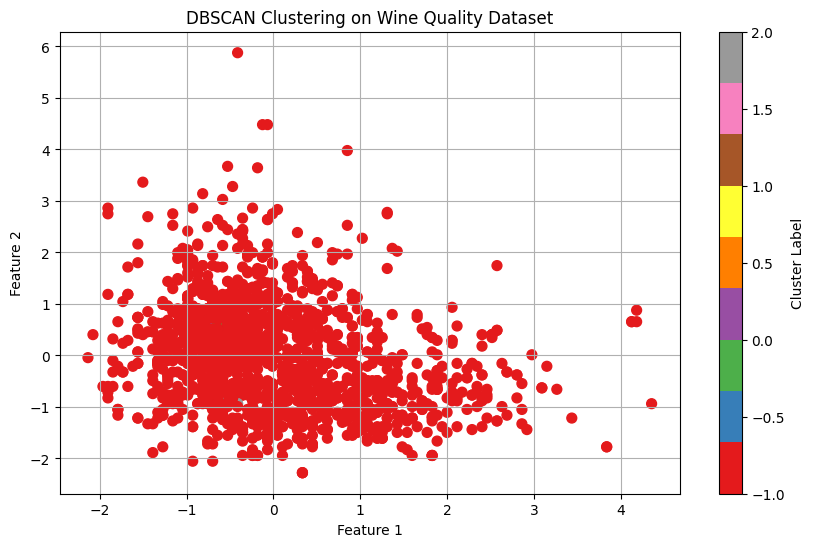

Cluster labels: [-1 -1 -1 ... -1 -1 -1]
Number of clusters found: 3


In [ ]:
from sklearn.datasets import fetch_openml

# Step 1: Load the Wine Quality dataset
# You can download it from the UCI repository or fetch it from OpenML
wine_data = fetch_openml('wine-quality-red', version=1, as_frame=True)
X = wine_data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the clustering results
# We will use the first two features for visualization purposes
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='Set1', s=50)
plt.title('DBSCAN Clustering on Wine Quality Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

# Step 5: Print the cluster labels
print("Cluster labels:", dbscan_labels)
print("Number of clusters found:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))  # Exclude noise


Here we will setup some Dictionaries of Lists as grids we will use to optimize models.

In [ ]:
svm_param_grid = {
    'svm__C': [0.1, 1],          # Regularization parameter
    'svm__gamma': [0.1, 0.01],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'svm__kernel': ['linear', 'poly'],  # Add the 'poly' kernel to the search space
    'svm__degree': [2, 3],              # Degree of the polynomial kernel
    'svm__probability': [True]
}

In [ ]:
svm_pipeline = Pipeline([
    # ('svm_scaler', StandardScaler()),  # Scaling step
    ('svm', SVC())  # Support Vector Machine model
])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
grid_search_svm = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, verbose=2)

# Fit the model with grid search
grid_search_svm.fit(X_train, y_train)

print("SVM Best parameters:", grid_search_svm.best_params_)
print("SVM Best cross-validation score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=   0.4s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=   0.4s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=   0.3s
[CV] END svm__C=0.1, svm__degree=

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
svm_best_model = grid_search_svm.best_estimator_


In [ ]:
svm_best_model

Pipeline(steps=[('svm',
                 SVC(C=0.1, degree=2, gamma=0.1, kernel='poly',
                     probability=True))])

In [ ]:
results = grid_search_svm.cv_results_

In [ ]:
y_pred_train = svm_best_model.predict(X_train)
y_pred = svm_best_model.predict(X_test)

In [ ]:
svm_train_accuracy = accuracy_score(y_train, y_pred_train)
svm_train_precision = precision_score(y_train, y_pred_train)
svm_train_recall = recall_score(y_train, y_pred_train)
svm_train_f1 = f1_score(y_train, y_pred_train)
svm_train_roc_auc = roc_auc_score(y_train, y_pred_train)

print("train Accuracy:", svm_train_accuracy)
print("train Precision:", svm_train_precision)
print("train Recall:", svm_train_recall)
print("train F1 Score:", svm_train_f1)
print("train ROC AUC:", svm_train_roc_auc)


svm_test_accuracy = accuracy_score(y_test, y_pred)
svm_test_precision = precision_score(y_test, y_pred)
svm_test_recall = recall_score(y_test, y_pred)
svm_test_f1 = f1_score(y_test, y_pred)
svm_test_roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", svm_test_accuracy)
print("Test Precision:", svm_test_precision)
print("Test Recall:", svm_test_recall)
print("Test F1 Score:", svm_test_f1)
print("Test ROC AUC:", svm_test_roc_auc)


train Accuracy: 0.985209074733096
train Precision: 0.90625
train Recall: 0.31351351351351353
train F1 Score: 0.4658634538152611
train ROC AUC: 0.6564161186279954
Test Accuracy: 0.9848206839032527
Test Precision: 0.9
Test Recall: 0.2926829268292683
Test F1 Score: 0.441717791411043
Test ROC AUC: 0.6460008639595932


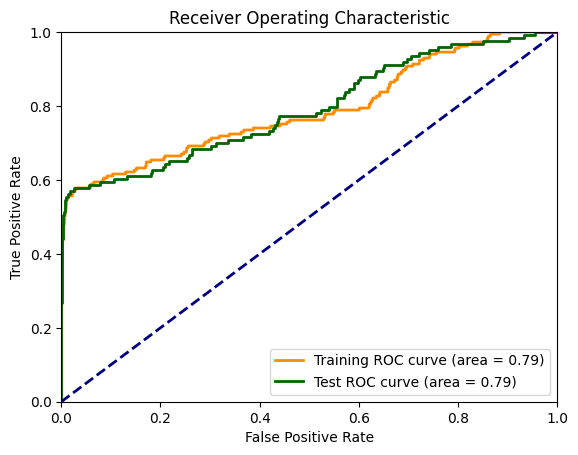

In [ ]:
svm_best_y_train_pred_prob = svm_best_model.predict_proba(X_train)[:, 1]
fpr_svm_train, tpr_svm_train, thresholds_svm_train = roc_curve(y_train, svm_best_y_train_pred_prob)
roc_auc_svm_train = auc(fpr_svm_train, tpr_svm_train)

svm_best_y_test_pred_prob = svm_best_model.predict_proba(X_test)[:, 1]
fpr_svm_test, tpr_svm_test, thresholds_svm_test = roc_curve(y_test, svm_best_y_test_pred_prob)
roc_auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure()
plt.plot(fpr_svm_train, tpr_svm_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_svm_train)
plt.plot(fpr_svm_test, tpr_svm_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_svm_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
svm_best_y_train_pred_prob = svm_best_model.predict_proba(X_train)[:, 1]
fpr_svm_train, tpr_svm_train, thresholds_svm_train = roc_curve(y_train, svm_best_y_train_pred_prob)
roc_auc_svm_train = auc(fpr_svm_train, tpr_svm_train)

svm_best_y_test_pred_prob = svm_best_model.predict_proba(X_test)[:, 1]
fpr_svm_test, tpr_svm_test, thresholds_svm_test = roc_curve(y_test, svm_best_y_test_pred_prob)
roc_auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure()
plt.plot(fpr_svm_train, tpr_svm_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_svm_train)
plt.plot(fpr_svm_test, tpr_svm_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_svm_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

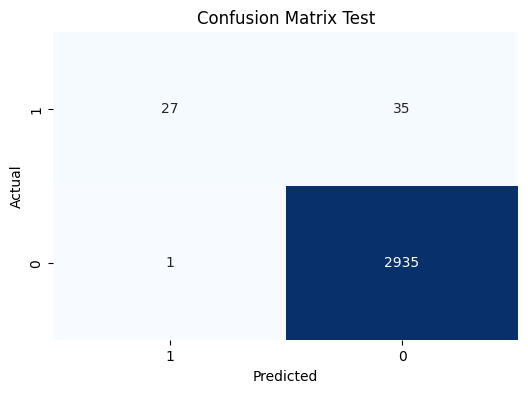

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()

### **ITERATE**



Lets give Recursive Feature Elimination a try...  RFE.

In [ ]:
from sklearn.inspection import permutation_importance


In [ ]:
result = permutation_importance(svm_best_model, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance values
importances = result.importances_mean

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: Importance {importance:.4f}")

Feature 0: Importance 0.0021
Feature 1: Importance 0.0093
Feature 2: Importance 0.0053
Feature 3: Importance 0.0018
Feature 4: Importance 0.0070
Feature 5: Importance 0.0007
Feature 6: Importance 0.0027


Not great - the imbalance is likely causing a problem.

Lets try dealing with the imbalance.  SMOTE, Under / Over Sampling are common approaches

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42, sampling_strategy=0.4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
# Fit the model with grid search
grid_search_svm.fit(X_train_resampled, y_train_resampled)

print("SVM Best parameters:", grid_search_svm.best_params_)
print("SVM Best cross-validation score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=  14.7s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=  13.5s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=  13.8s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=  13.9s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=linear, svm__probability=True; total time=  12.4s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=  15.4s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=  15.8s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=0.1, svm__kernel=poly, svm__probability=True; total time=  16.0s
[CV] END svm__C=0.1, svm__degree=

In [ ]:
svm_best_model = grid_search_svm.best_estimator_


In [ ]:
y_pred_train_resampled = svm_best_model.predict(X_train_resampled)
y_pred = svm_best_model.predict(X_test)

In [ ]:
svm_train_accuracy_resampled = accuracy_score(y_train_resampled, y_pred_train_resampled)
svm_train_precision_resampled = precision_score(y_train_resampled, y_pred_train_resampled)
svm_train_recall_resampled = recall_score(y_train_resampled, y_pred_train_resampled)
svm_train_f1_resampled = f1_score(y_train_resampled, y_pred_train_resampled)
svm_train_roc_auc_resampled = roc_auc_score(y_train_resampled, y_pred_train_resampled)

print("train Accuracy:", svm_train_accuracy_resampled)
print("train Precision:", svm_train_precision_resampled)
print("train Recall:", svm_train_recall_resampled)
print("train F1 Score:", svm_train_f1_resampled)
print("train ROC AUC:", svm_train_roc_auc_resampled)


svm_test_accuracy = accuracy_score(y_test, y_pred)
svm_test_precision = precision_score(y_test, y_pred)
svm_test_recall = recall_score(y_test, y_pred)
svm_test_f1 = f1_score(y_test, y_pred)
svm_test_roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", svm_test_accuracy)
print("Test Precision:", svm_test_precision)
print("Test Recall:", svm_test_recall)
print("Test F1 Score:", svm_test_f1)
print("Test ROC AUC:", svm_test_roc_auc)

train Accuracy: 0.8597323600973236
train Precision: 0.9455833022735743
train Recall: 0.5401319991483926
train F1 Score: 0.6875338753387535
train ROC AUC: 0.7638495301881791
Test Accuracy: 0.9803202134756505
Test Precision: 0.5238095238095238
Test Recall: 0.532258064516129
Test F1 Score: 0.5280000000000001
Test ROC AUC: 0.7610200404324514


Compared to...

train Accuracy: 0.985403286345817

train Precision: 0.8901098901098901

train Recall: 0.32926829268292684

train F1 Score: 0.4807121661721068

train ROC AUC: 0.6642083607670787

Test Accuracy: 0.9879919946631087

Test Precision: 0.9642857142857143

Test Recall: 0.43548387096774194

Test F1 Score: 0.6

Test ROC AUC: 0.7175716357563506

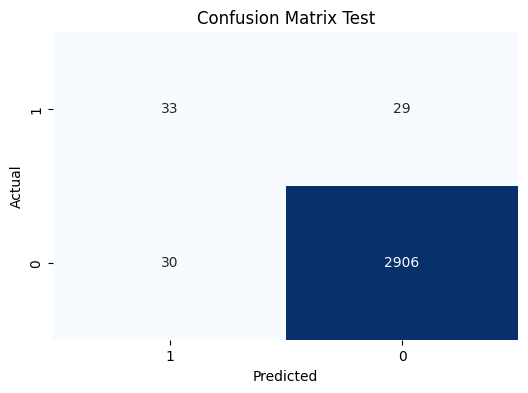

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()

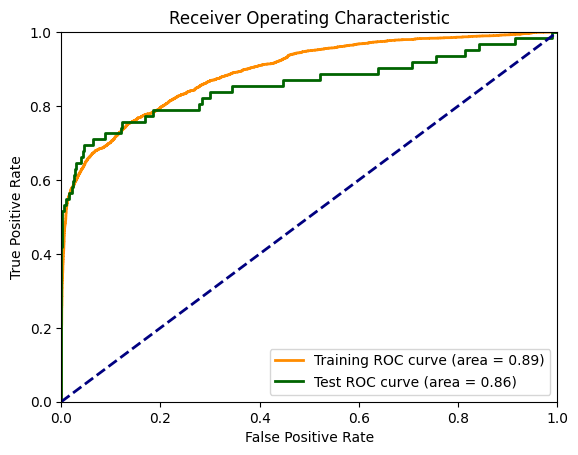

In [ ]:
svm_best_y_train_pred_prob_resampled = svm_best_model.predict_proba(X_train_resampled)[:, 1]
fpr_svm_train, tpr_svm_train, thresholds_svm_train = roc_curve(y_train_resampled, svm_best_y_train_pred_prob_resampled)
roc_auc_svm_train = auc(fpr_svm_train, tpr_svm_train)

svm_best_y_test_pred_prob = svm_best_model.predict_proba(X_test)[:, 1]
fpr_svm_test, tpr_svm_test, thresholds_svm_test = roc_curve(y_test, svm_best_y_test_pred_prob)
roc_auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure()
plt.plot(fpr_svm_train, tpr_svm_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_svm_train)
plt.plot(fpr_svm_test, tpr_svm_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_svm_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Is KNN a better option?**

Class
0    11743
1     4697
Name: count, dtype: int64


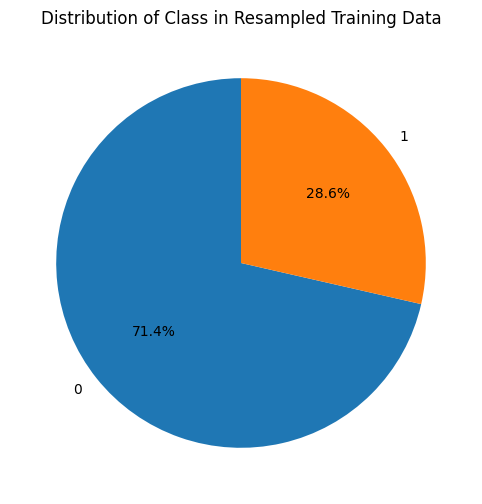

In [ ]:
class_counts_resampled = y_train_resampled.value_counts()
print(class_counts_resampled)
plt.figure(figsize=(8, 6))
plt.pie(class_counts_resampled, labels=class_counts_resampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class in Resampled Training Data')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('knn_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'knn__weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'knn__p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, verbose=2)

# Fit the model with grid search
grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("KNN Best parameters:", grid_search_knn.best_params_)
print("KNN Best cross-validation score:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.4s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.3s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.3s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.3s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.1s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.1s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.1s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.1s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.1s
[CV] END .knn__n_neighbors=3, knn__p=2, knn__weights=uniform; total time=   0.3s
[CV] END .knn__n_neighbors=3, knn__p=2, knn__wei

In [ ]:
knn_best_model = grid_search_knn.best_estimator_

y_pred_train_resampled = knn_best_model.predict(X_train_resampled)
y_pred = knn_best_model.predict(X_test)

In [ ]:
knn_train_accuracy_resampled = accuracy_score(y_train_resampled, y_pred_train_resampled)
knn_train_precision_resampled = precision_score(y_train_resampled, y_pred_train_resampled)
knn_train_recall_resampled = recall_score(y_train_resampled, y_pred_train_resampled)
knn_train_f1_resampled = f1_score(y_train_resampled, y_pred_train_resampled)
knn_train_roc_auc_resampled = roc_auc_score(y_train_resampled, y_pred_train_resampled)

print("train Accuracy:", knn_train_accuracy_resampled)
print("train Precision:", knn_train_precision_resampled)
print("train Recall:", knn_train_recall_resampled)
print("train F1 Score:", knn_train_f1_resampled)
print("train ROC AUC:", knn_train_roc_auc_resampled)


knn_test_accuracy = accuracy_score(y_test, y_pred)
knn_test_precision = precision_score(y_test, y_pred)
knn_test_recall = recall_score(y_test, y_pred)
knn_test_f1 = f1_score(y_test, y_pred)
knn_test_roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", knn_test_accuracy)
print("Test Precision:", knn_test_precision)
print("Test Recall:", knn_test_recall)
print("Test F1 Score:", knn_test_f1)
print("Test ROC AUC:", knn_test_roc_auc)


train Accuracy: 1.0
train Precision: 1.0
train Recall: 1.0
train F1 Score: 1.0
train ROC AUC: 1.0
Test Accuracy: 0.9296197464976651
Test Precision: 0.16289592760180996
Test Recall: 0.5806451612903226
Test F1 Score: 0.254416961130742
Test ROC AUC: 0.7588171310538806


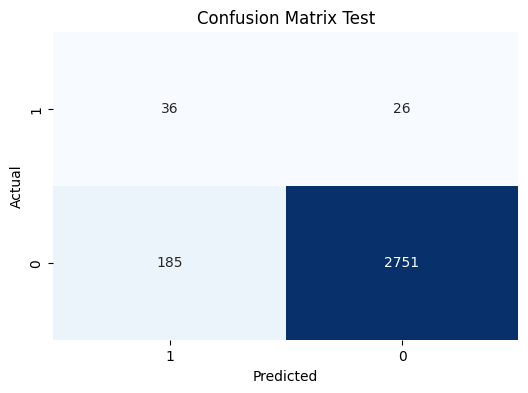

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()

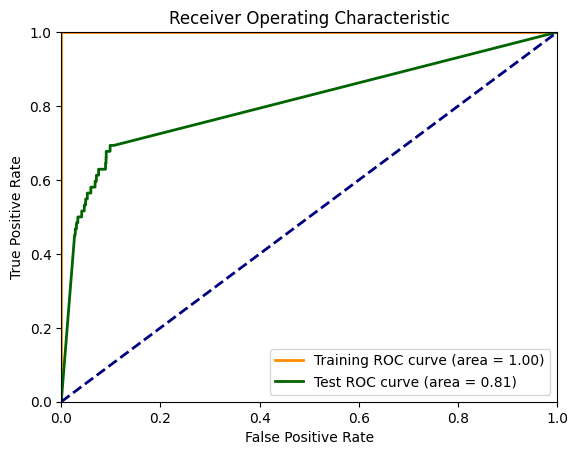

In [ ]:
knn_best_y_train_pred_prob_resampled = knn_best_model.predict_proba(X_train_resampled)[:, 1]
fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(y_train_resampled, knn_best_y_train_pred_prob_resampled)
roc_auc_knn_train = auc(fpr_knn_train, tpr_knn_train)

knn_best_y_test_pred_prob = knn_best_model.predict_proba(X_test)[:, 1]
fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(y_test, knn_best_y_test_pred_prob)
roc_auc_knn_test = auc(fpr_knn_test, tpr_knn_test)

plt.figure()
plt.plot(fpr_knn_train, tpr_knn_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_knn_train)
plt.plot(fpr_knn_test, tpr_knn_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_knn_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


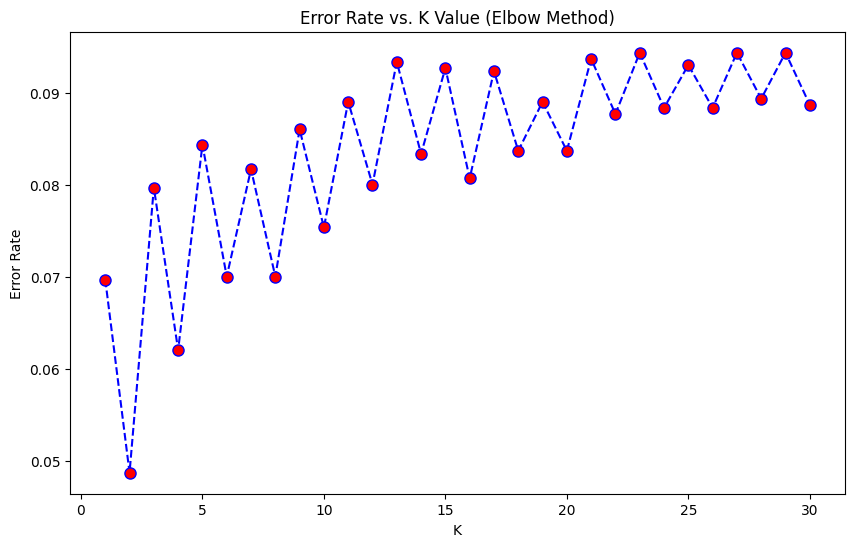

In [ ]:
error_rates = []
k_values = range(1, 31)  # Testing k values from 1 to 30

# Loop over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculate the error rate
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

# Plot the error rates vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value (Elbow Method)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

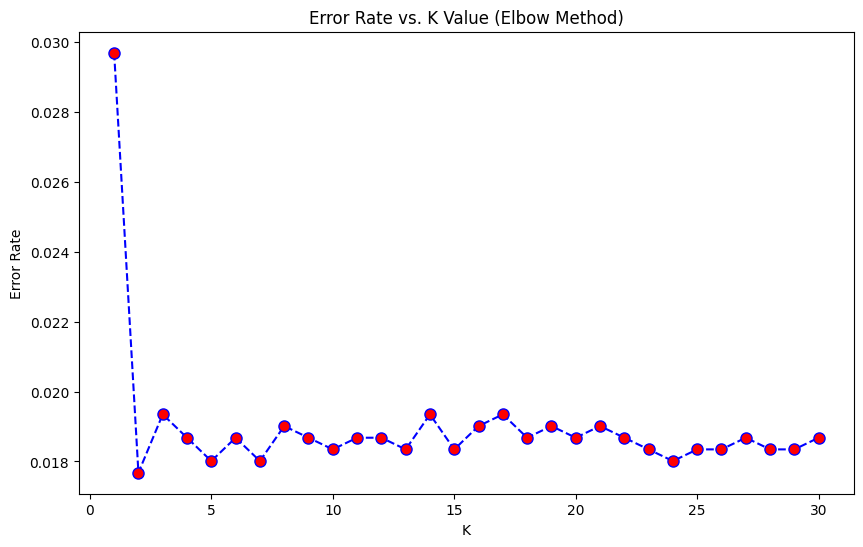

In [ ]:
error_rates = []
k_values = range(1, 31)  # Testing k values from 1 to 30

# Loop over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculate the error rate
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

# Plot the error rates vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value (Elbow Method)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn_eye_balled = KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
knn_eye_balled.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
y_pred_train_resampled = knn_eye_balled.predict(X_train_resampled)
y_pred = knn_eye_balled.predict(X_test)

knn_train_accuracy_resampled = accuracy_score(y_train_resampled, y_pred_train_resampled)
knn_train_precision_resampled = precision_score(y_train_resampled, y_pred_train_resampled)
knn_train_recall_resampled = recall_score(y_train_resampled, y_pred_train_resampled)
knn_train_f1_resampled = f1_score(y_train_resampled, y_pred_train_resampled)
knn_train_roc_auc_resampled = roc_auc_score(y_train_resampled, y_pred_train_resampled)

print("train Accuracy:", knn_train_accuracy_resampled)
print("train Precision:", knn_train_precision_resampled)
print("train Recall:", knn_train_recall_resampled)
print("train F1 Score:", knn_train_f1_resampled)
print("train ROC AUC:", knn_train_roc_auc_resampled)


knn_test_accuracy = accuracy_score(y_test, y_pred)
knn_test_precision = precision_score(y_test, y_pred)
knn_test_recall = recall_score(y_test, y_pred)
knn_test_f1 = f1_score(y_test, y_pred)
knn_test_roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", knn_test_accuracy)
print("Test Precision:", knn_test_precision)
print("Test Recall:", knn_test_recall)
print("Test F1 Score:", knn_test_f1)
print("Test ROC AUC:", knn_test_roc_auc)

train Accuracy: 1.0
train Precision: 1.0
train Recall: 1.0
train F1 Score: 1.0
train ROC AUC: 1.0
Test Accuracy: 0.9276184122748499
Test Precision: 0.12560386473429952
Test Recall: 0.41935483870967744
Test F1 Score: 0.19330855018587365
Test ROC AUC: 0.6788531686736399


Okay that was not great... could be our data may require a more adcanced model.  How about going back and seeing if a ensemble approach is better.  Rewind to week 5 and lets use a tree based method.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   3.7s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   3.6s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   4.3s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   4.2s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   5.6s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=  11.4s
[CV] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_sa

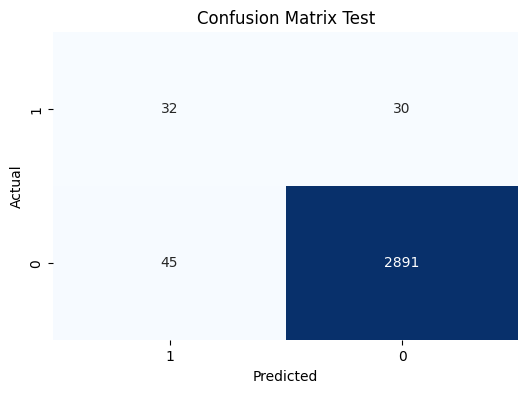

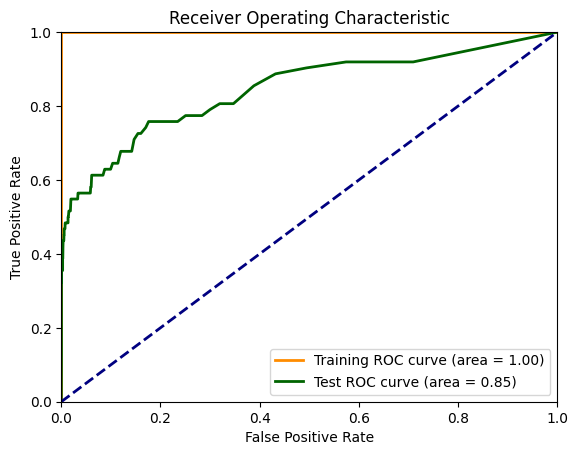

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # we are remiving the scaling as tree methods do no need that.
])

rf_param_grid = {
    'rf__n_estimators': [100, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'rf__max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, verbose=2)

# Fit the model with grid search
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("RF Best parameters:", grid_search_rf.best_params_)
print("RF Best cross-validation score:", grid_search_rf.best_score_)

rf_best_model = grid_search_rf.best_estimator_

y_pred_train_resampled = rf_best_model.predict(X_train_resampled)
y_pred = rf_best_model.predict(X_test)

rf_train_accuracy_resampled = accuracy_score(y_train_resampled, y_pred_train_resampled)
rf_train_precision_resampled = precision_score(y_train_resampled, y_pred_train_resampled)
rf_train_recall_resampled = recall_score(y_train_resampled, y_pred_train_resampled)
rf_train_f1_resampled = f1_score(y_train_resampled, y_pred_train_resampled)
rf_train_roc_auc_resampled = roc_auc_score(y_train_resampled, y_pred_train_resampled)

print("train Accuracy:", rf_train_accuracy_resampled)
print("train Precision:", rf_train_precision_resampled)
print("train Recall:", rf_train_recall_resampled)
print("train F1 Score:", rf_train_f1_resampled)
print("train ROC AUC:", rf_train_roc_auc_resampled)

rf_test_accuracy = accuracy_score(y_test, y_pred)
rf_test_precision = precision_score(y_test, y_pred)
rf_test_recall = recall_score(y_test, y_pred)
rf_test_f1 = f1_score(y_test, y_pred)
rf_test_roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", rf_test_accuracy)
print("Test Precision:", rf_test_precision)
print("Test Recall:", rf_test_recall)
print("Test F1 Score:", rf_test_f1)
print("Test ROC AUC:", rf_test_roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()
rf_best_y_train_pred_prob_resampled = rf_best_model.predict_proba(X_train_resampled)[:, 1]
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(y_train_resampled, rf_best_y_train_pred_prob_resampled)
roc_auc_rf_train = auc(fpr_rf_train, tpr_rf_train)

rf_best_y_test_pred_prob = rf_best_model.predict_proba(X_test)[:, 1]
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(y_test, rf_best_y_test_pred_prob)
roc_auc_rf_test = auc(fpr_rf_test, tpr_rf_test)

plt.figure()
plt.plot(fpr_rf_train, tpr_rf_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_rf_train)
plt.plot(fpr_rf_test, tpr_rf_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_rf_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


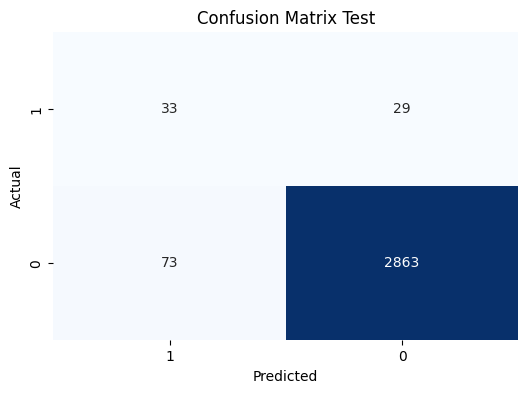

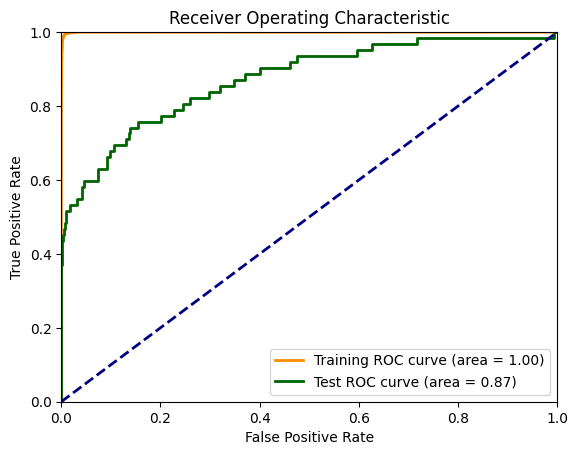

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()
xgb_best_y_train_pred_prob_resampled = xgb_best_model.predict_proba(X_train_resampled)[:, 1]
fpr_xgb_train, tpr_xgb_train, thresholds_xgb_train = roc_curve(y_train_resampled, xgb_best_y_train_pred_prob_resampled)
roc_auc_xgb_train = auc(fpr_xgb_train, tpr_xgb_train)

xgb_best_y_test_pred_prob = xgb_best_model.predict_proba(X_test)[:, 1]
fpr_xgb_test, tpr_xgb_test, thresholds_xgb_test = roc_curve(y_test, xgb_best_y_test_pred_prob)
roc_auc_xgb_test = auc(fpr_xgb_test, tpr_xgb_test)

plt.figure()
plt.plot(fpr_xgb_train, tpr_xgb_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_xgb_train)
plt.plot(fpr_xgb_test, tpr_xgb_test, color='darkgreen', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_xgb_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'fpr_knn_test' is not defined

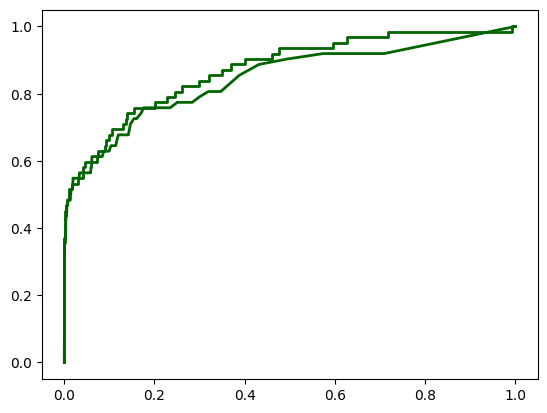

In [ ]:
plt.figure()
plt.plot(fpr_xgb_test, tpr_xgb_test, color='darkgreen', lw=2, label='XGB Test ROC curve (area = %0.2f)' % roc_auc_xgb_test)
plt.plot(fpr_rf_test, tpr_rf_test, color='darkgreen', lw=2, label='RF Test ROC curve (area = %0.2f)' % roc_auc_rf_test)
plt.plot(fpr_knn_test, tpr_knn_test, color='red', lw=2, label='KNN Test ROC curve (area = %0.2f)' % roc_auc_knn_test)
plt.plot(fpr_svm_test, tpr_svm_test, color='brown', lw=2, label='SVM Test ROC curve (area = %0.2f)' % roc_auc_svm_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
